# **Предсказание риска ожирения на основе различных факторов**

- Выполнить исследовательский анализ данных (EDA)
- Предварительно обработать данные
- Построить и оценим модель **MLP** для предсказания риска ожирения



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## **Загрузка данных**


In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


## **Первоначальный анализ данных**


In [6]:
print("First 5 lines of training set:")
display(train_df.head())

First 5 lines of training set:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
print("Training set information:")
train_df.info()

Training set information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC   

In [8]:
print("Number of missing values in the training set:")
print(train_df.isnull().sum())

Number of missing values in the training set:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## **Анализ распределения целевой переменной**


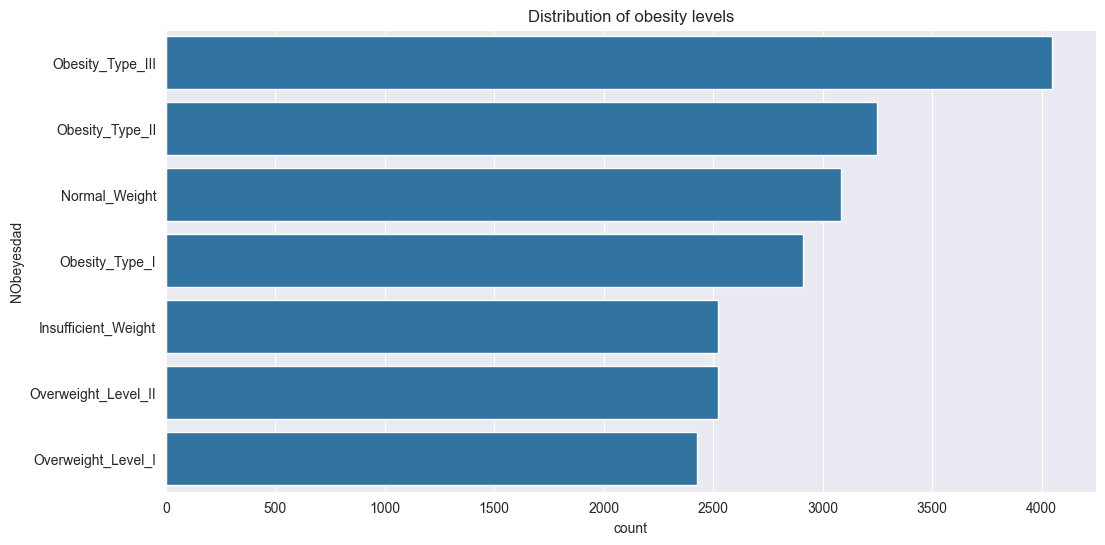

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, y='NObeyesdad', order=train_df['NObeyesdad'].value_counts().index)
plt.title('Distribution of obesity levels')
plt.show()


## **Определение числовых и категориальных признаков**


In [10]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                        'SMOKE', 'SCC', 'CALC', 'MTRANS']


## **Гистограммы числовых признаков**


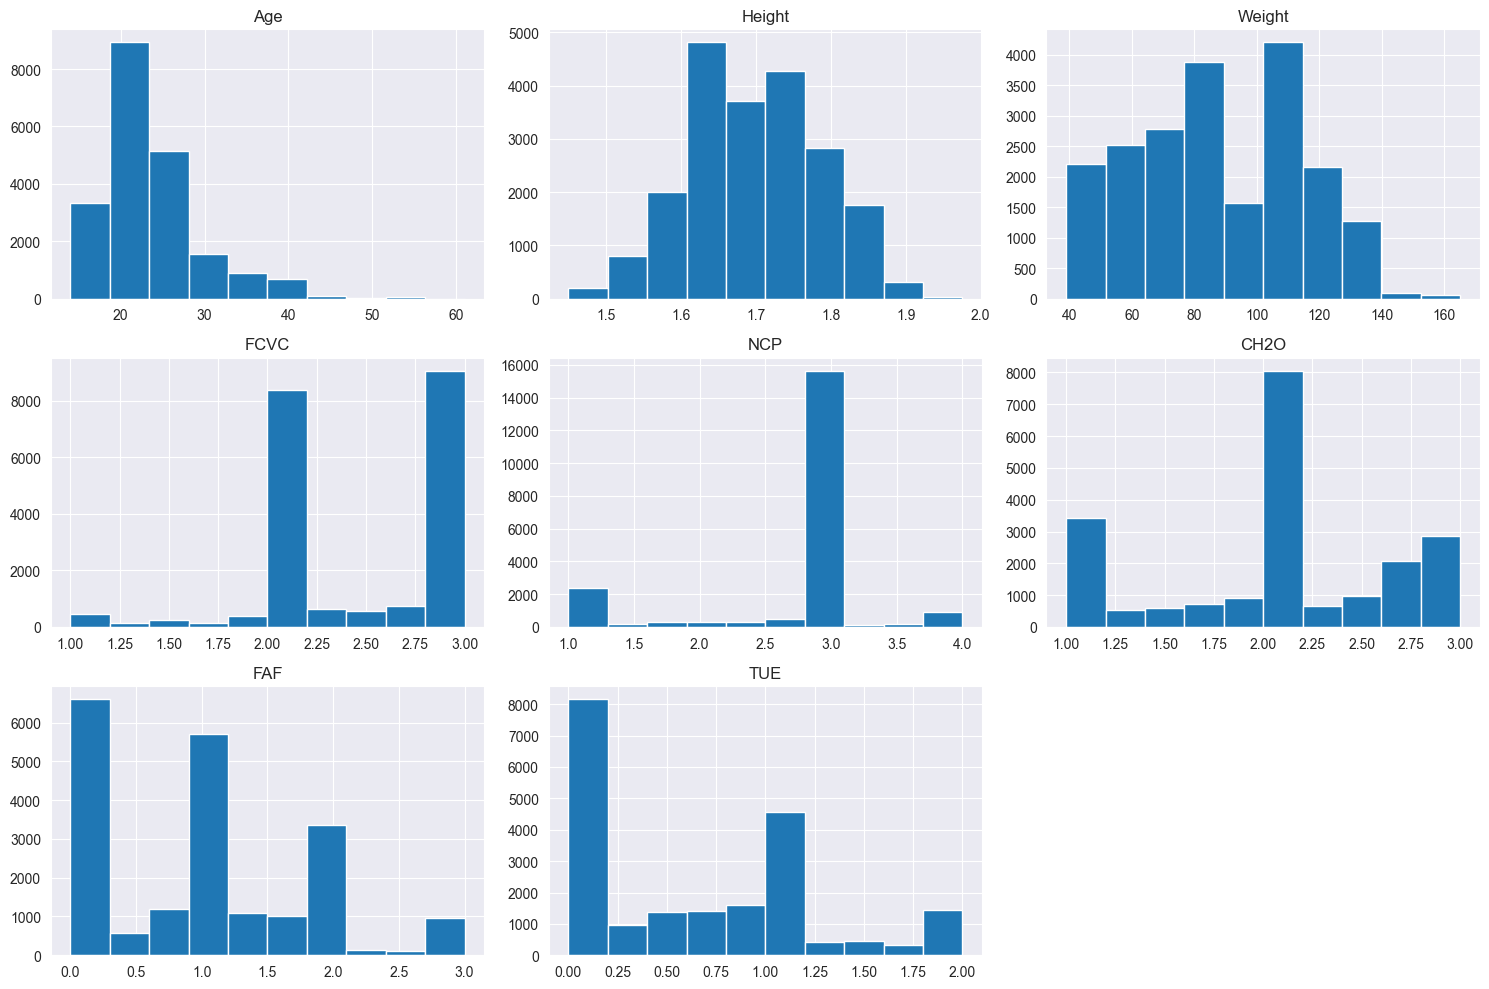

In [11]:
train_df[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


## **Корреляционная матрица числовых признаков**


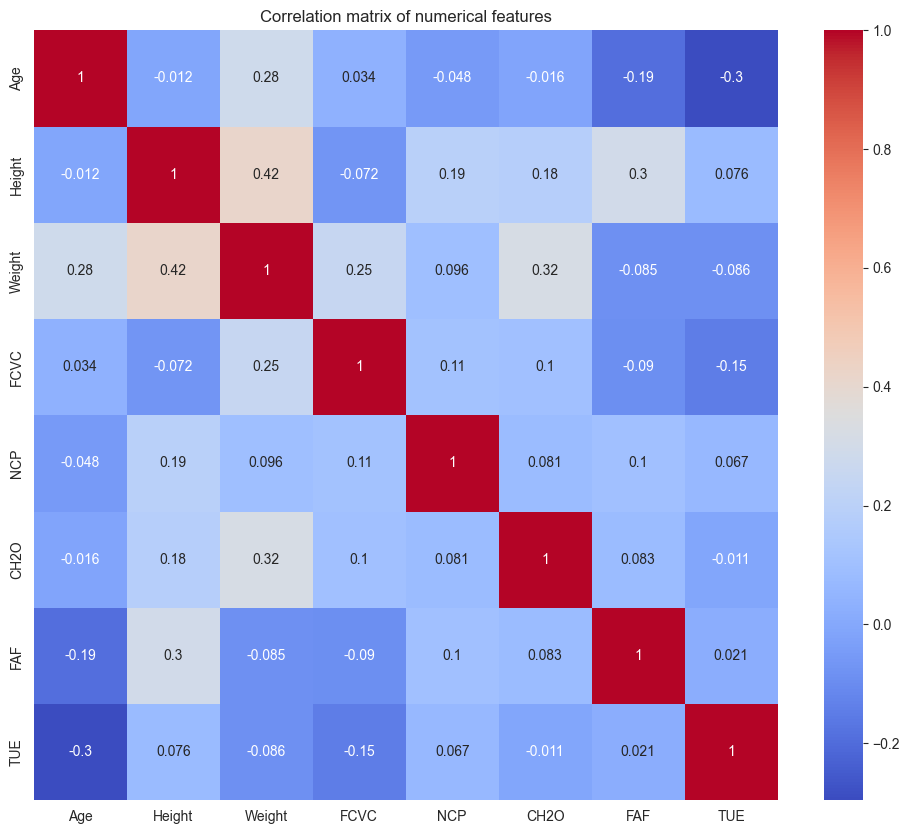

In [12]:
corr_matrix = train_df[numerical_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features')
plt.show()


## **Анализ категориальных признаков**


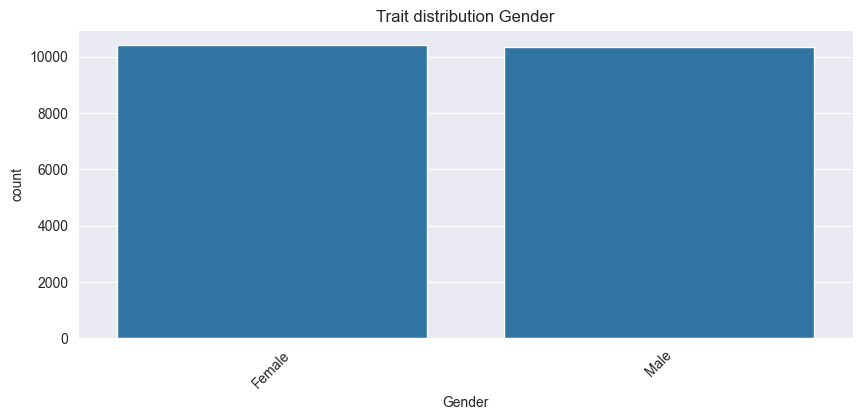

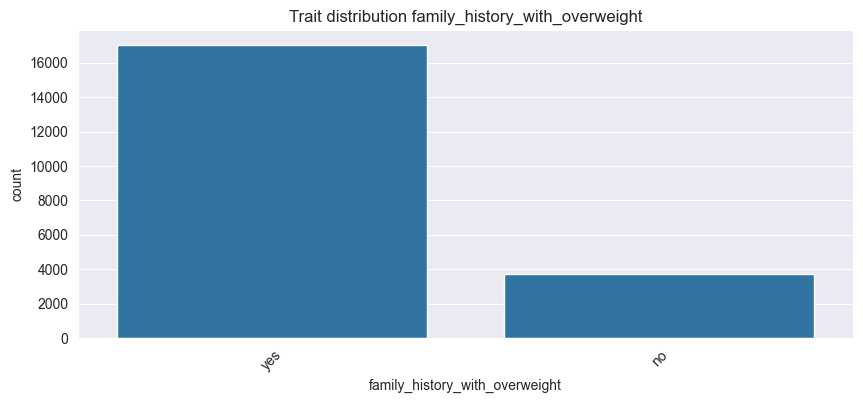

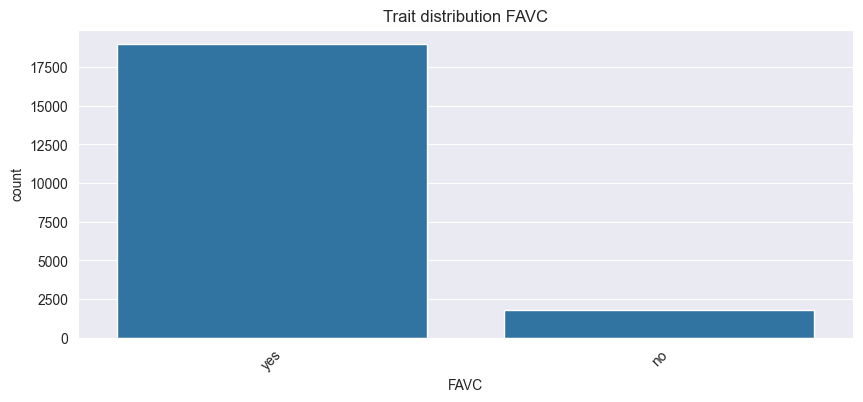

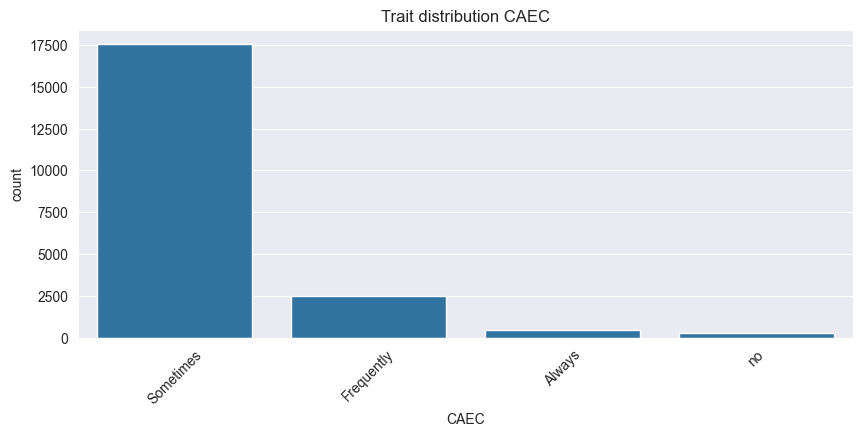

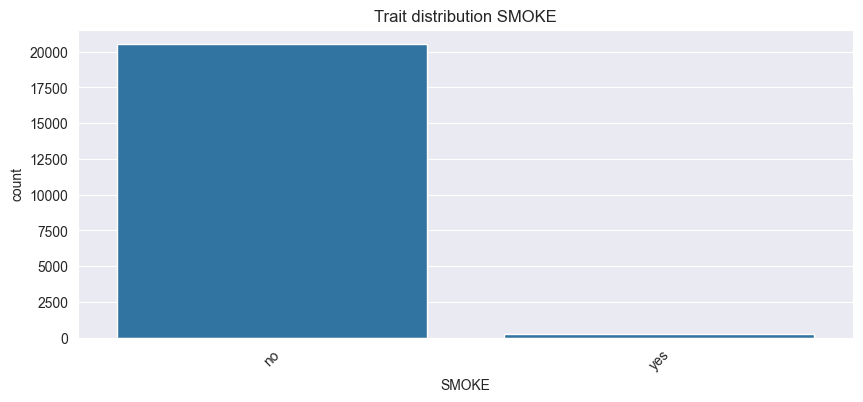

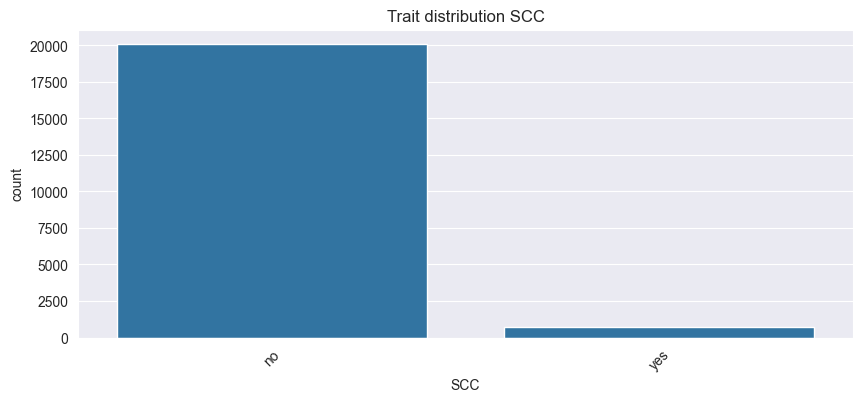

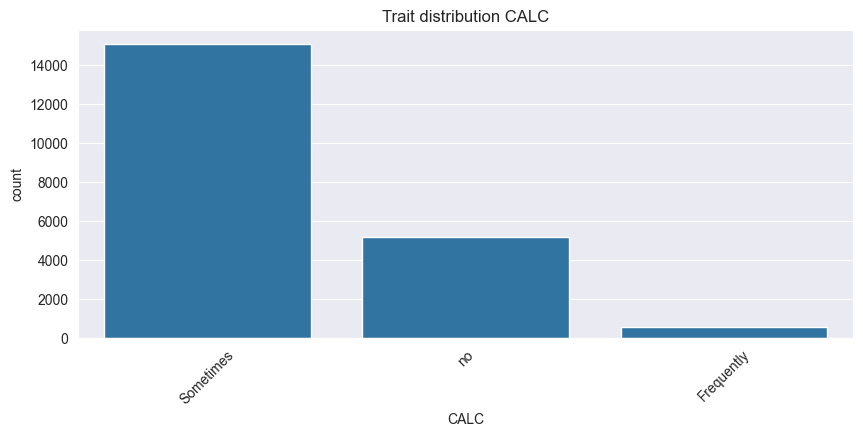

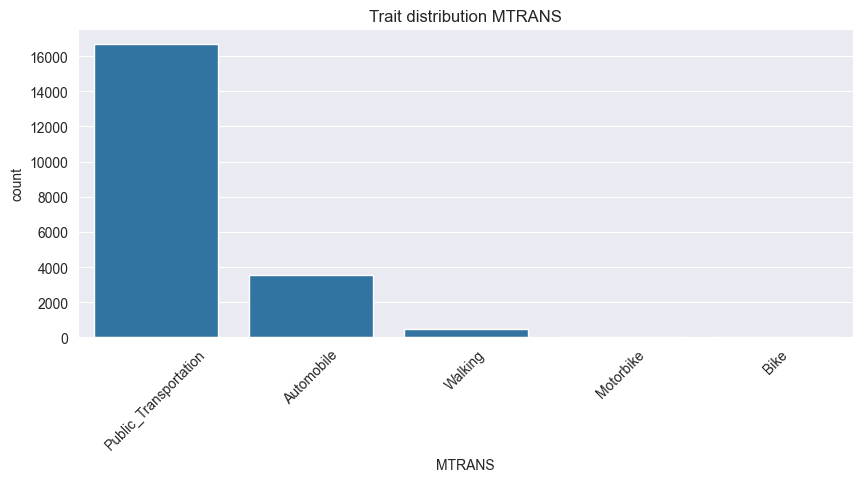

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_df, x=feature, order=train_df[feature].value_counts().index)
    plt.title(f'Trait distribution {feature}')
    plt.xticks(rotation=45)
    plt.show()


## **Предварительная обработка данных**


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


### **Кодирование целевой переменной**


In [15]:
label_encoder = LabelEncoder()
train_df['NObeyesdad'] = label_encoder.fit_transform(train_df['NObeyesdad'])

### **Создание нового признака BMI (индекс массы тела)**


In [16]:
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)

### **Объединение данных для единообразной обработки**


In [17]:
combined_df = pd.concat([train_df.drop('NObeyesdad', axis=1), test_df], axis=0)

### **Преобразование категориальных признаков (One-Hot Encoding)**


In [18]:
combined_df = pd.get_dummies(combined_df, columns=categorical_features)


### **Масштабирование числовых признаков**


In [19]:
scaler = StandardScaler()
combined_df[numerical_features + ['BMI']] = scaler.fit_transform(combined_df[numerical_features + ['BMI']])


### **Разделение данных обратно на обучающий и тестовый наборы**


In [20]:
train_features = combined_df.iloc[:train_df.shape[0], :]
test_features = combined_df.iloc[train_df.shape[0]:, :]

train_features['NObeyesdad'] = train_df['NObeyesdad']

### **Разделение признаков и целевой переменной**

In [21]:
X = train_features.drop('NObeyesdad', axis=1)
y = train_features['NObeyesdad']


### **Разделение на обучающую и валидационную выборки**


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Балансировка классов с помощью SMOTE**


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Training sample size after balancing:")
print(pd.Series(y_train_resampled).value_counts())


Training sample size after balancing:
NObeyesdad
2    3237
0    3237
6    3237
3    3237
5    3237
4    3237
1    3237
Name: count, dtype: int64


## **Построение и обучение модели MLP**


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'hidden_layer_sizes': [(150, 100, 50), (100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=1)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_resampled, y_train_resampled)

print('Best parameters found GridSearchCV:')
print(clf.best_params_)


Best parameters found GridSearchCV:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


### **Обучение модели с лучшими параметрами**



In [25]:
best_mlp = clf.best_estimator_
best_mlp.fit(X_train_resampled, y_train_resampled)

MLPClassifier(max_iter=500, random_state=1)

## **Оценка улучшенной модели**


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_mlp.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation selection accuracy after improvements: {accuracy:.2f}')


Validation selection accuracy after improvements: 0.54


In [27]:
print("Classification report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

Classification report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.31      0.99      0.47       505
      Normal_Weight       0.63      0.06      0.11       617
     Obesity_Type_I       0.79      0.32      0.45       582
    Obesity_Type_II       0.91      0.60      0.72       650
   Obesity_Type_III       0.70      1.00      0.82       809
 Overweight_Level_I       0.58      0.24      0.33       485
Overweight_Level_II       0.45      0.42      0.44       504

           accuracy                           0.54      4152
          macro avg       0.63      0.52      0.48      4152
       weighted avg       0.64      0.54      0.50      4152


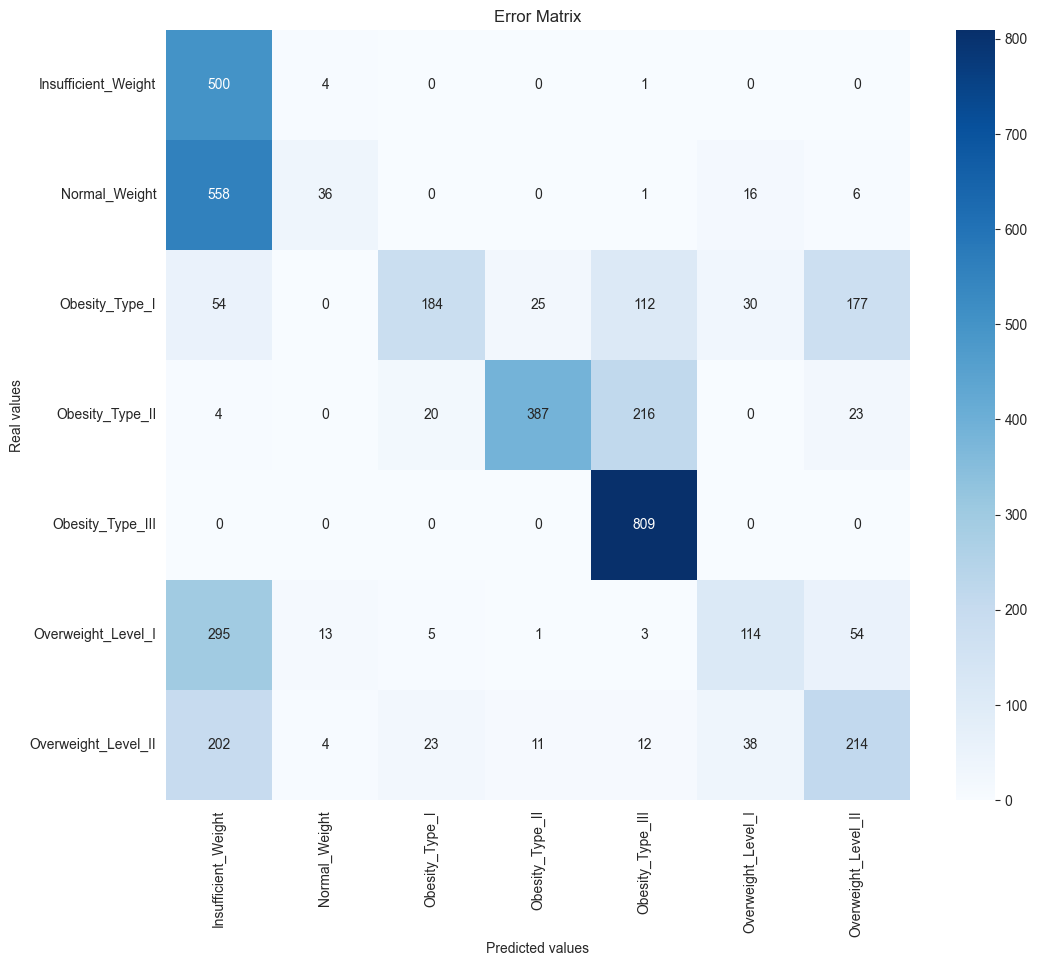

In [28]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title('Error Matrix')
plt.ylabel('Real values')
plt.xlabel('Predicted values')
plt.show()

## **Предсказания на тестовом наборе**


In [30]:
test_predictions = best_mlp.predict(test_features)

test_predictions_labels = label_encoder.inverse_transform(test_predictions)

submission = pd.DataFrame({
    'id': test_df['id'],
    'NObeyesdad': test_predictions_labels
})

submission.to_csv('submission.csv', index=False)
print("submission.csv successfully saved")

submission.csv successfully saved
